In [21]:
#The purpose of this project is to depict the disparites between each rank within the ranked system of the tactical-FPS shooter
#Valorant. Through conducting an exploratory data analysis (EDA) byu utilizing the Python pandas library,
#we are able to show the more nuanced aspects of skill that differentiate players betweene each rank. 

#The data was extrapolated from the website blitz.gg and processed into a .CSV file
#Blitz.gg gets their data from API of the company that developed Valorant (Riot Games)

#The project also consists of two machine learning models developed
#using scikit-learn that predict the KD ratio and Average Combat score of a player based 
#off of various statistics such as rank, win %, first blood %, etc.

#For additional background information, the ranks are as follows in ascending order (lowest-highest rank)

#Iron
#Bronze
#Silver
#Gold
#Platinum
#Diamond
#Immortal 
#Radiant

#There are three divisions from the Iron-Diamond ranks; however, for this project we will only use
#the first division for each rank.

In [1]:
import pandas as pd
#First dataframe consists of all combination of agents and ranks and various statistics
df = pd.read_csv("datasets/RankedData.csv")
#Second dataframe consists of weapon statistics for main weapons (phantom/vandal) and ranks
df_weapon = pd.read_csv("datasets/WeaponData.csv")

In [9]:
#Determining which agent (character) and at what rank has the highest average match Win % when selected
df[df['Win %'] == df['Win %'].max()]

,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
Agent Rank,,,,,,,,,
Radiant Astra,1.07,15.9 / 14.9 / 4.6,0.554,0.028,213,0.101,9384,Radiant,Astra


In [32]:
#Determining which agent (character) and at what rank has the highest average match Pick %
df[df['Pick %'] == df['Pick %'].max()]

,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
Agent Rank,,,,,,,,,
Radiant Jett,1.14,18.6 / 16.4 / 3.6,0.511,0.193,253,0.206,65943,Radiant,Jett


In [11]:
#Creating a subset of data frame that only consists of data of Silver 1 players
silver_df = df[df['Rank'] == "Silver 1"]
#Determining which agent has the greatest win % at the Silver 1 rank
silver_df[silver_df['Win %'] == silver_df['Win %'].max()]

,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
Agent Rank,,,,,,,,,
Silver 1 Raze,1.05,16.1 / 15.3 / 5.0,0.51,0.088,241,0.149,1732980,Silver 1,Raze


In [73]:
#In what rank does Sova have the highest win %? Using Groupby function we can determine this
Sova = df.groupby('Agent').get_group("Sova")
Sova[Sova['Win %'] == Sova['Win %'].max()]

,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
Agent Rank,,,,,,,,,
Radiant Sova,1.05,15.4 / 14.7 / 7.2,0.516,0.114,216,0.086,38811,Radiant,Sova


In [75]:
df[df['First Blood %'] == df['First Blood %'].max()] #Radiant Jett has the greatest first blood % @ 20.6%

,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
Agent Rank,,,,,,,,,
Radiant Jett,1.14,18.6 / 16.4 / 3.6,0.511,0.193,253,0.206,65943,Radiant,Jett


<AxesSubplot:xlabel='Agent Rank'>

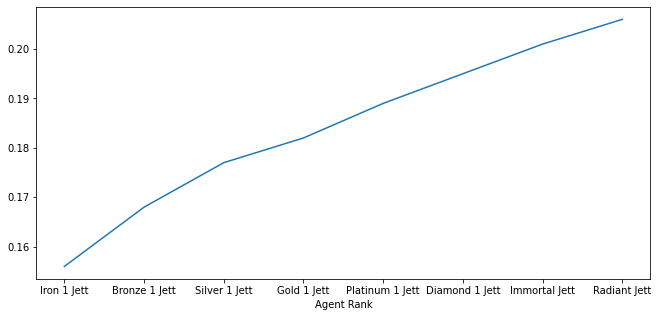

In [17]:
jett_df = df[df['Agent'] == "Jett"]
jett_df = jett_df.set_index("Agent Rank")
#Graphing the first blood % of the agent Jett at each rank
jett_df['First Blood %'].plot(figsize=(11,5))

# As seen, as the rank of a Jett player increases, their first blood % increases since the role of a Jett is to entry
#(meaning a Jett player should be the first one onto site)
#This plot depicts how as the rank of a user who plays Jett increases, they begin to understand how to properly play their role
#as en entry fragger.

<AxesSubplot:xlabel='Agent Rank'>

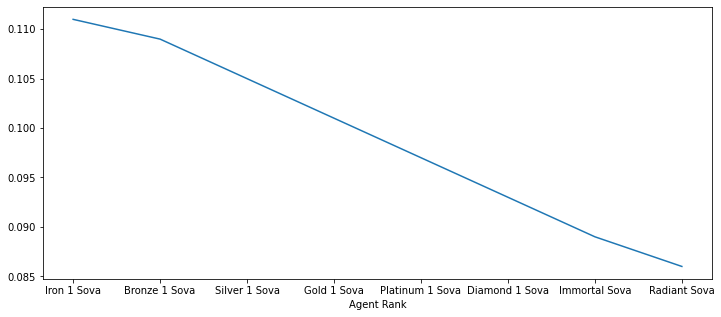

In [19]:
sova_firstBlood = df[df['Agent'] == "Sova"]
sova_firstBlood = sova_firstBlood.set_index("Agent Rank")
sova_firstBlood['First Blood %'].plot(figsize=(12,5))

#Here, we plot the first blood % of the agent Sova, whose role is that of a support character (meaning that they should not)
#be entrying like the agent Jett would 

#As shown, as the rank of a user who plays Sova increases, their understanding of their role increases which causes their
#first blood % to decrease heavily.

In [34]:
silver_winRate = df[df['Rank'] == "Silver 1"]
silver_winRate = silver_winRate.set_index("Agent Rank")
silver_winRate[silver_winRate['Win %'] == silver_winRate['Win %'].max()]

,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
Agent Rank,,,,,,,,,
Silver 1 Raze,1.05,16.1 / 15.3 / 5.0,0.51,0.088,241,0.149,1732980,Silver 1,Raze


<AxesSubplot:xlabel='Agent Rank'>

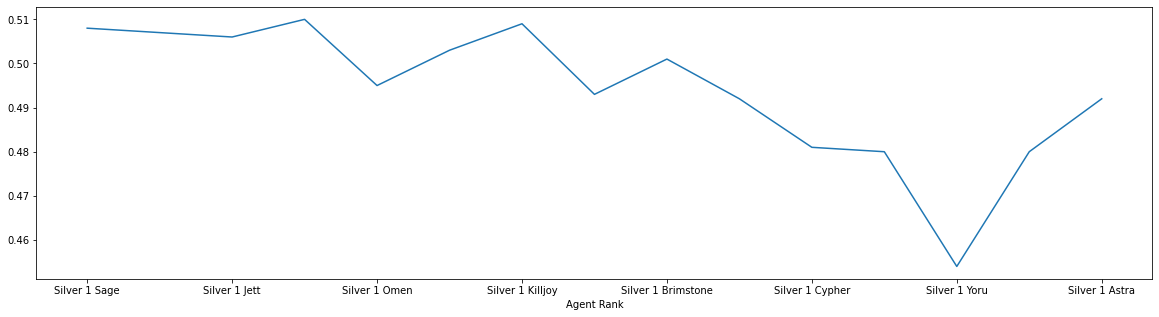

In [35]:
silver_winRate['Win %'].plot(figsize=(20,5))

In [36]:
platinum_winRate = df[df['Rank'] == "Platinum 1"]
platinum_winRate = platinum_winRate.set_index("Agent Rank")
platinum_winRate[platinum_winRate['Win %'] == platinum_winRate['Win %'].max()]

,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
Agent Rank,,,,,,,,,
Platinum 1 Raze,1.05,16.6 / 15.8 / 4.9,0.516,0.084,242,0.153,687072,Platinum 1,Raze


<AxesSubplot:xlabel='Agent Rank'>

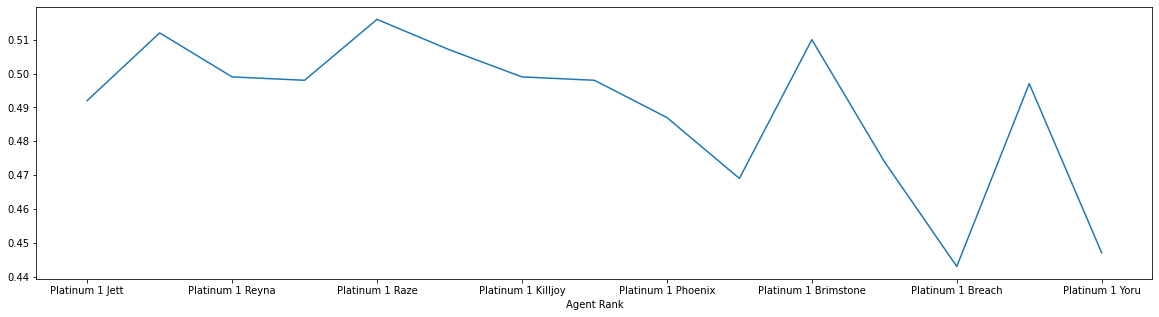

In [38]:
platinum_winRate['Win %'].plot(figsize=(20,5))

In [8]:
#Grouping the data set by the agent that is equal to Jett
jett_pickRate = df.groupby('Agent').get_group("Jett")

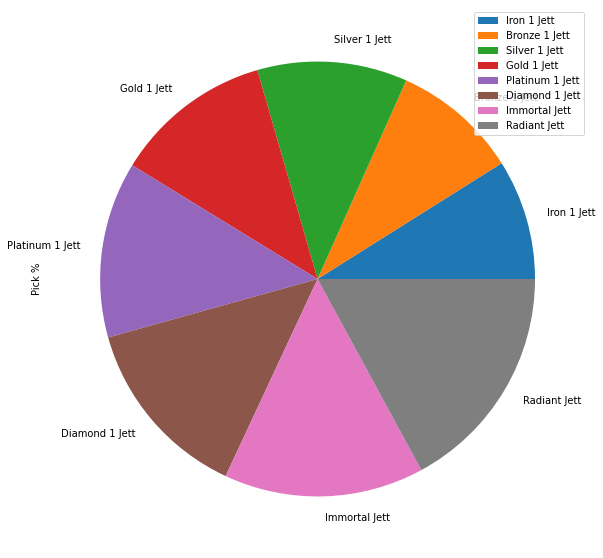

In [7]:
#Creating a piechart that displays the pick rate of Jett at all ranks
plot = jett_pickRate.plot.pie(y='Pick %', figsize=(10, 10))

In [15]:
#Tabular depiction of Jett's pick rate at all ranks
jett_pickRate.head(8)

,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
Agent Rank,,,,,,,,,
Iron 1 Jett,0.93,13.3 / 14.3 / 3.6,0.512,0.101,200,0.156,292383,Iron 1,Jett
Bronze 1 Jett,1.07,16.0 / 15.0 / 4.0,0.510,0.106,234,0.168,1568964,Bronze 1,Jett
Silver 1 Jett,1.14,17.4 / 15.2 / 3.9,0.506,0.126,251,0.177,2491095,Silver 1,Jett
Gold 1 Jett,1.11,17.3 / 15.6 / 3.8,0.502,0.133,246,0.182,2221560,Gold 1,Jett
Platinum 1 Jett,1.10,17.4 / 15.8 / 3.7,0.492,0.148,244,0.189,1213290,Platinum 1,Jett
Diamond 1 Jett,1.09,17.4 / 16.0 / 3.6,0.498,0.155,242,0.195,516375,Diamond 1,Jett
Immortal Jett,1.07,17.3 / 16.1 / 3.5,0.493,0.168,240,0.201,813450,Immortal,Jett
Radiant Jett,1.14,18.6 / 16.4 / 3.6,0.511,0.193,253,0.206,65943,Radiant,Jett


In [4]:
#Start of the creation of ML models that predict KD and Avg. Score. 
#Creating two dictionaries to quantify the rank and agent values. Since agent's value is arbitary the numerical
#representation of agent does not matter. However, for ranks, the digit increases the rank increases since rank is not arbitary.
rank_class_dict = {"Iron 1": 1, "Bronze 1":2, "Silver 1":3, "Gold 1": 4, "Platinum 1":5, "Diamond 1":6, "Immortal": 7, "Radiant": 8}
agent_class_dict = {"Sage":1, "Raze": 2, "Reyna": 3, "Sova":4, "Astra": 5, "Viper": 6, "Breach": 7, "Brimstone": 8, "Phoenix": 9, "Jett": 10, "Yoru": 11, "Omen": 12, "Skye": 13, "Cypher":14, "Killjoy":15}

#Mapping rank and agent dictionaries to rank and agent columns
df['Rank'] = df['Rank'].map(rank_class_dict)
df['Agent'] = df['Agent'].map(agent_class_dict)


In [7]:
#Depicting mapped dataframe's head
df.head()

,Agent Rank,KD,KDA,Win %,Pick %,Avg. Score,First Blood %,Matches,Rank,Agent
0,Iron 1 Sage,0.76,10.6 / 14.0 / 5.7,0.518,0.176,160,0.114,510561,1,1
1,Iron 1 Raze,0.89,12.9 / 14.5 / 4.7,0.518,0.117,202,0.141,339609,1,2
2,Iron 1 Reyna,0.97,14.0 / 14.4 / 4.4,0.516,0.116,212,0.156,338538,1,3
3,Iron 1 Jett,0.93,13.3 / 14.3 / 3.6,0.512,0.101,200,0.156,292383,1,10
4,Iron 1 Sova,0.78,11.1 / 14.2 / 5.0,0.511,0.075,170,0.111,217974,1,4


In [5]:
import sklearn
from sklearn import svm, preprocessing
#Shuffling dataframe since the data is sorted.
df = sklearn.utils.shuffle(df)

#First ML model that predicts the Avg. Score based off various statistics within the dataframe
X = df.drop(["Agent Rank",'KDA', 'Matches','Avg. Score','Agent'],axis = 1).values
X = preprocessing.scale(X)
y = df['Avg. Score'].values

test_size = 105
X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

clf_acs = svm.SVR(kernel="linear")

clf_acs.fit(X_train,y_train)


#Second ML model that predicts the KD based off various statistics within the dataframe
X2 = df.drop(["Agent Rank",'KDA', 'Matches','KD','Agent'],axis = 1).values
X2 = preprocessing.scale(X)
y2= df['KD'].values

test_size2 = 102
X2_train = X2[:-test_size2]
y2_train = y2[:-test_size2]

X2_test = X2[-test_size2:]
y2_test = y2[-test_size2:]

clf_kd = svm.SVR(kernel="linear")

clf_kd.fit(X2_train,y2_train)


SVR(kernel='linear')

In [6]:
clf_acs.score(X_test,y_test)

0.8212277030334585

In [7]:
for X,y in zip(X_test,y_test):
    print(f"Model: {clf_acs.predict([X])[0]}, Actual: {y}")

Model: 200.31053127942977, Actual: 199
Model: 211.92317181581177, Actual: 213
Model: 196.29664254434107, Actual: 195
Model: 203.72881676379413, Actual: 210
Model: 198.19548010233896, Actual: 198
Model: 226.30411111273193, Actual: 232
Model: 223.15362367579505, Actual: 239
Model: 208.1615149396765, Actual: 202
Model: 201.09904796822028, Actual: 205
Model: 186.9999593357257, Actual: 171
Model: 197.5031287161922, Actual: 196
Model: 242.71733326733735, Actual: 251
Model: 242.22270883685027, Actual: 246
Model: 242.21672927117382, Actual: 250
Model: 199.67705111435382, Actual: 196
Model: 200.4253138801003, Actual: 194
Model: 247.13192498848275, Actual: 240
Model: 202.28355204241322, Actual: 202
Model: 199.06127670198507, Actual: 197
Model: 200.77179897200546, Actual: 199
Model: 202.34785235835253, Actual: 201
Model: 228.3455398534147, Actual: 233
Model: 205.4748967910536, Actual: 202
Model: 198.81820772931437, Actual: 197
Model: 239.13837837701047, Actual: 255
Model: 200.1116296871576, Actua

In [ ]:
clf_kd.score(X2_test,y2_test)

In [9]:
for X2,y2 in zip(X2_test,y2_test):
    print(f"Model: {clf_kd.predict([X2])[0]}, Actual: {y2}")

Model: 0.9958493713541182, Actual: 0.97
Model: 0.9634204506147256, Actual: 0.96
Model: 1.0255412366198746, Actual: 1.04
Model: 0.9992229971515466, Actual: 1.03
Model: 0.926242815583985, Actual: 0.89
Model: 0.9565902898133286, Actual: 0.97
Model: 0.909395753998147, Actual: 0.81
Model: 0.9311339224260714, Actual: 0.91
Model: 1.0391288720299565, Actual: 1.14
Model: 1.0347287109794732, Actual: 1.11
Model: 1.0549175377181292, Actual: 1.15
Model: 0.9560722860478523, Actual: 0.92
Model: 0.9539274345559791, Actual: 0.94
Model: 1.0384697179553313, Actual: 1.07
Model: 0.9628464858652276, Actual: 0.95
Model: 0.9490040416479507, Actual: 0.95
Model: 0.9760055232131344, Actual: 0.98
Model: 0.9636272610652935, Actual: 0.97
Model: 1.0445168022071072, Actual: 1.06
Model: 0.9605089962104083, Actual: 0.91
Model: 0.9598809133318648, Actual: 0.92
Model: 1.0358526639484504, Actual: 1.16
Model: 0.9717481259130937, Actual: 0.98
Model: 0.9928298315925895, Actual: 0.99
Model: 1.0318689522170357, Actual: 1.09
Mo

<AxesSubplot:xlabel='Rank Weapon'>

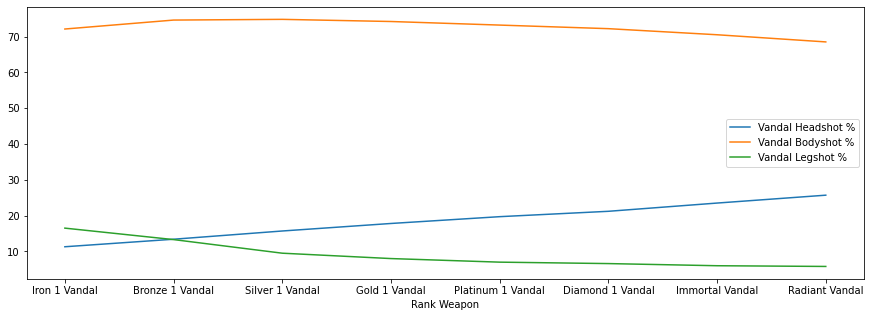

In [26]:
#Creating a subset of weapon dataframe that isolates the vandal weapon
vandal  = df_weapon[df_weapon["Weapon"] == "Vandal"]
vandal = vandal.set_index("Rank Weapon")
#Plotting Headshot, Bodyshot, and legshot % for the vandal at all ranks
vandal["Headshot %"].plot(figsize=(15,5), label = "Vandal Headshot %", legend = True)
vandal["Bodyshot %"].plot(figsize=(15,5), label = "Vandal Bodyshot %", legend = True)
vandal["Legshot %"].plot(figsize=(15,5), label = "Vandal Legshot %", legend = True)


<AxesSubplot:xlabel='Rank Weapon'>

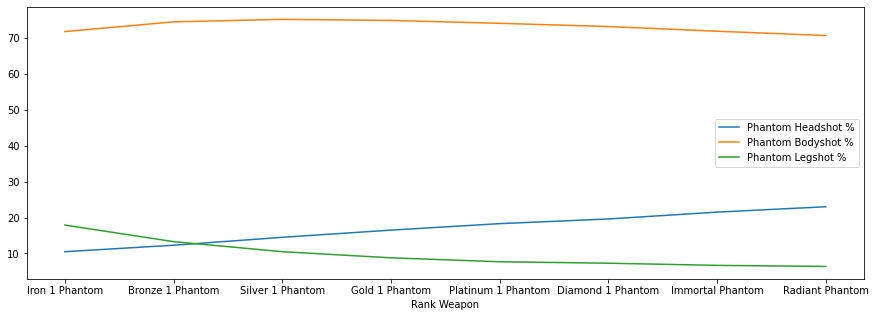

In [19]:
#Creating a subset of weapon dataframe that isolates Phantom weapon
phantom  = df_weapon[df_weapon["Weapon"] == "Phantom"]
phantom = phantom.set_index("Rank Weapon")
#Plotting Headshot, Bodyshot, and legshot % for the phantom at all ranks
phantom["Headshot %"].plot(figsize=(15,5), label = "Phantom Headshot %", legend = True)
phantom["Bodyshot %"].plot(figsize=(15,5), label = "Phantom Bodyshot %", legend = True)
phantom["Legshot %"].plot(figsize=(15,5), label = "Phantom Legshot %", legend = True)

<AxesSubplot:xlabel='Rank'>

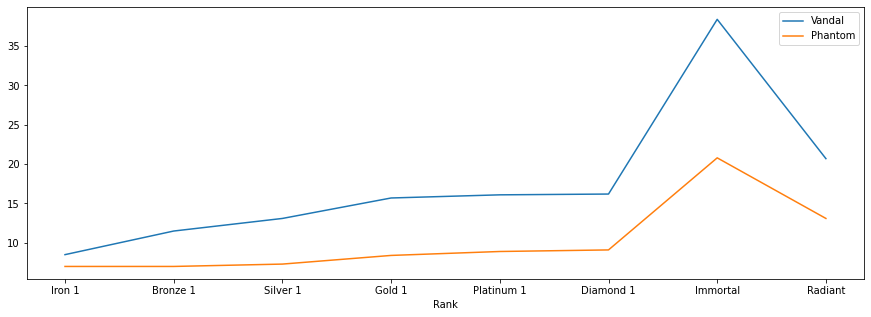

In [27]:
#Creating subsets of weapon dataframe in order to graph the kills per match for both vandal and phantom at all ranks
vandal_kpm = df_weapon[df_weapon["Weapon"] == "Vandal"]
vandal_kpm = vandal_kpm.set_index("Rank")
phantom_kpm = df_weapon[df_weapon["Weapon"] == "Phantom"]
phantom_kpm = phantom_kpm.set_index("Rank")
vandal_kpm['Kills per Match'].plot(figsize=(15,5), label = "Vandal", legend = True)
phantom_kpm['Kills per Match'].plot(figsize=(15,5),label= "Phantom",legend = True)